In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.patches as patches
from pyfonts import load_font
from highlight_text import fig_text, ax_text
from drawarrow import ax_arrow
from matplotlib.patches import FancyArrowPatch
%matplotlib inline

In [2]:
df = pd.read_excel("E-commerce.xlsx")
df.head()

,Row ID,Order ID,Order Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,State,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
0,13,CA-2017-114412,2020-04-15,Standard Class,AA-10480,Andrew Allen,Consumer,United States,Concord,North Carolina,28027,South,OFF-PA-10002365,Office Supplies,Paper,Xerox 1967,15.552,3,0.2,5.4432
1,24,US-2017-156909,2020-07-16,Second Class,SF-20065,Sandra Flanagan,Consumer,United States,Philadelphia,Pennsylvania,19140,East,FUR-CH-10002774,Furniture,Chairs,"Global Deluxe Stacking Chair, Gray",71.372,2,0.3,-1.0196
2,35,CA-2017-107727,2020-10-19,Second Class,MA-17560,Matt Abelman,Home Office,United States,Houston,Texas,77095,Central,OFF-PA-10000249,Office Supplies,Paper,Easy-staple paper,29.472,3,0.2,9.9468
3,42,CA-2017-120999,2020-09-10,Standard Class,LC-16930,Linda Cazamias,Corporate,United States,Naperville,Illinois,60540,Central,TEC-PH-10004093,Technology,Phones,Panasonic Kx-TS550,147.168,4,0.2,16.5564
4,44,CA-2017-139619,2020-09-19,Standard Class,ES-14080,Erin Smith,Corporate,United States,Melbourne,Florida,32935,South,OFF-ST-10003282,Office Supplies,Storage,"Advantus 10-Drawer Portable Organizer, Chrome ...",95.616,2,0.2,9.5616


In [3]:
df2 = df.copy()
df2 = df2[["Customer ID","Profit"]]
df2.head()

,Customer ID,Profit
0,AA-10480,5.4432
1,SF-20065,-1.0196
2,MA-17560,9.9468
3,LC-16930,16.5564
4,ES-14080,9.5616


In [4]:
customer_profitability = df2.groupby('Customer ID')['Profit'].sum().reset_index()
customer_profitability.sort_values("Profit", ascending=False).head()

,Customer ID,Profit
543,RB-19360,6780.8963
291,HL-15040,5045.8564
636,TA-21385,4599.2073
43,AR-10540,2607.6814
362,JW-15220,1953.2680


In [5]:
# Total profit and sort data by profit in descending order
total_profit = customer_profitability['Profit'].sum()
customer_profitability = customer_profitability.sort_values('Profit', ascending=False)

# Cumulative profit and percentage of total profit
customer_profitability['Cumulative Profit'] = customer_profitability['Profit'].cumsum()
customer_profitability['Cumulative Percentage'] = (customer_profitability['Cumulative Profit'] / total_profit) * 100

# Cumulative percentage of customers
num_customers = len(customer_profitability)
customer_profitability['Cumulative Customers'] = [(i + 1) / num_customers * 100 for i in range(num_customers)]
customer_profitability

,Customer ID,Profit,Cumulative Profit,Cumulative Percentage,Cumulative Customers
543,RB-19360,6780.8963,6780.8963,7.257009,0.144300
291,HL-15040,5045.8564,11826.7527,12.657154,0.288600
636,TA-21385,4599.2073,16425.9600,17.579290,0.432900
43,AR-10540,2607.6814,19033.6414,20.370067,0.577201
362,JW-15220,1953.2680,20986.9094,22.460481,0.721501
...,...,...,...,...,...
167,DB-13120,-1136.7180,105957.6697,113.397365,99.422799
486,NC-18415,-2330.2698,103627.3999,110.903478,99.567100
286,HG-14965,-2971.3827,100656.0172,107.723463,99.711400
620,SR-20425,-3391.4082,97264.6090,104.093931,99.855700


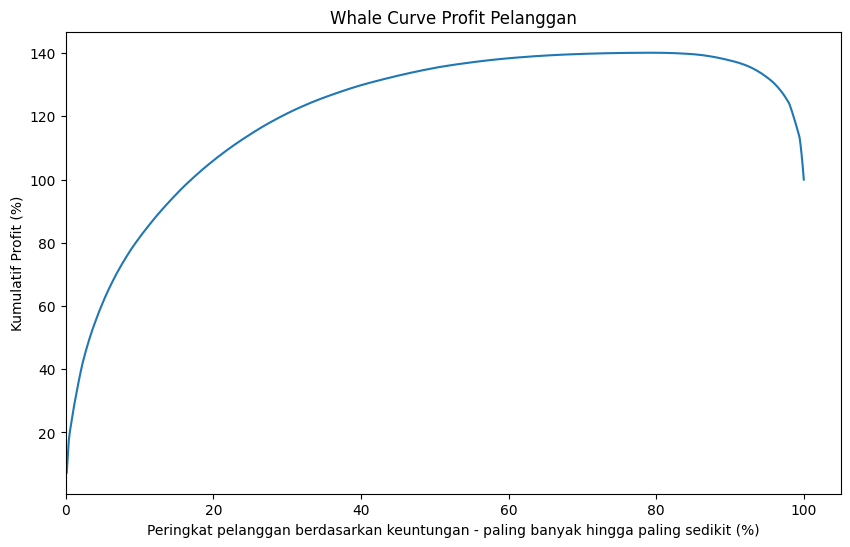

In [6]:
# Membuat Whale Curve menggunakan ax
fig, ax = plt.subplots(figsize=(10, 6))

ax.plot(customer_profitability['Cumulative Customers'], 
        customer_profitability['Cumulative Percentage'], 
        linestyle='-')

ax.set_xlim(0) 

ax.set_title('Whale Curve Profit Pelanggan')
ax.set_xlabel('Peringkat pelanggan berdasarkan keuntungan - paling banyak hingga paling sedikit (%)')
ax.set_ylabel('Kumulatif Profit (%)')
ax.grid(False)

plt.show()

In [7]:
high_profitable_costumer = customer_profitability[customer_profitability["Cumulative Customers"] <= 20]
middle_profitable_customer = customer_profitability[
    (customer_profitability["Cumulative Customers"] > 20) & (customer_profitability["Cumulative Customers"] <= 80)]
low_profitable_customer = customer_profitability[
    (customer_profitability["Cumulative Customers"] > 80) & (customer_profitability["Cumulative Customers"] <= 100)]

print(f"20% (High Profit) dari konsumen menghasilkan {round(profitable_costumer['Cumulative Percentage'].iloc[-1], 2)}% dari profit")
print(f"60% (Medium Profit) dari konsumen menghasilkan {round(middle_profitable_customer['Cumulative Percentage'].iloc[-1] - middle_profitable_customer['Cumulative Percentage'].iloc[0], 2)}% dari profit")
print(f"20% (Low Profit) dari konsumen menghasilkan {round(low_profitable_customer['Cumulative Percentage'].iloc[-1] - low_profitable_customer['Cumulative Percentage'].iloc[0], 2)}% dari profit")

20% (High Profit) dari konsumen menghasilkan 105.84% dari profit
60% (Medium Profit) dari konsumen menghasilkan 34.02% dari profit
20% (Low Profit) dari konsumen menghasilkan -40.14% dari profit


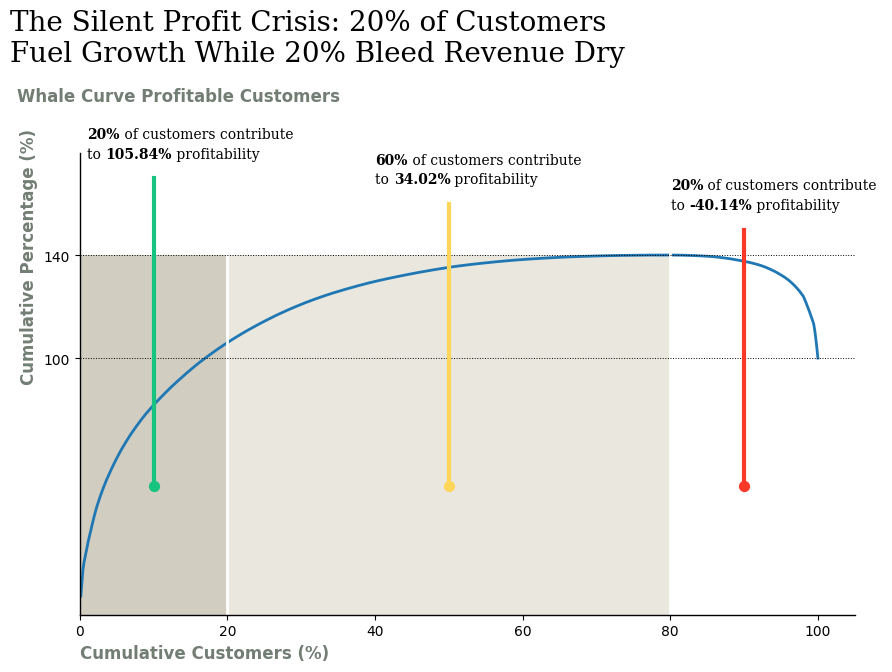

In [10]:
from matplotlib.font_manager import FontProperties


# Load font
bold_font = FontProperties(family="serif", weight="bold", size=10)


# Whale Curve menggunakan ax
fig, ax = plt.subplots(figsize=(10, 6))

#Plot
ax.plot(customer_profitability['Cumulative Customers'], 
        customer_profitability['Cumulative Percentage'], 
         linewidth=2,
        linestyle='-')

# Scatter
ax.scatter(10, 50, color='#16C47F',alpha=1, s=50)  
ax.scatter(50, 50, color='#FFD65A',alpha=1, s=50)  
ax.scatter(90, 50, color='#F93827',alpha=1, s=50) 

# Garis Tambahan Horizontal
ax.axvline(20, color='w', linestyle='-', linewidth=2,zorder=2)
ax.axvline(80, color='w', linestyle='-', linewidth=2,zorder=2)

# Garis Tambahan Vertikal
ax.axhline(140, color='black', linestyle=':', linewidth=0.7)
ax.axhline(100, color='black', linestyle=':', linewidth=0.7)


rect = patches.Rectangle((0, 0), 20, 140, linewidth=1, facecolor='#A59D84',alpha=0.5,zorder=0)
rect1 = patches.Rectangle((20, 0), 60, 140, linewidth=1, facecolor='#D7D3BF',alpha=0.5,zorder=0)
ax.add_patch(rect)
ax.add_patch(rect1)

# Atur batas sumbu x dimulai dari 0
ax.set_xlim(0)  
ax.set_ylim(0, 180)
ax.set_yticks([100, 140])
# Menghilangkan garis luar canvas
for spine in ax.spines.values():
    spine.set_visible(False)
    
ax.spines['bottom'].set_visible(True)
ax.spines['left'].set_visible(True)
ax.spines['bottom'].set_linewidth(1)
ax.spines['left'].set_linewidth(1)

ax.plot([10, 10], [50, 170], color='#16C47F',alpha=1, linewidth=3, linestyle='-')
ax.plot([50, 50], [50, 160], color='#FFD65A',alpha=1, linewidth=3, linestyle='-')
ax.plot([90, 90], [50, 150], color='#F93827',alpha=1, linewidth=3, linestyle='-')

ax_text(x=15, y=190, s="<20%> of customers contribute\nto <105.84%> profitability",fontfamily='serif', fontsize=10, ha='center',color="black", highlight_textprops=[{'fontproperties': bold_font},  
                             {'fontproperties': bold_font}])
ax_text(x=54, y=180, s="<60%> of customers contribute\nto <34.02%> profitability",fontfamily='serif', fontsize=10, ha='center',color="black", highlight_textprops=[{'fontproperties': bold_font},  
                             {'fontproperties': bold_font}])
ax_text(x=94, y=170, 
        s="<20%> of customers contribute\nto <-40.14%> profitability", 
        fontfamily='serif', fontsize=10, ha='center', color="black",
        highlight_textprops=[{'fontproperties': bold_font},  
                             {'fontproperties': bold_font}]) 

#Sub-Title
plt.text(-8.5, 200, "Whale Curve Profitable Customers",
          fontsize=12, weight="bold", color="#727D73", ha='left')

# Menambahkan label dan judul
plt.title("The Silent Profit Crisis: 20% of Customers\nFuel Growth While 20% Bleed Revenue Dry",
          fontsize=20,fontfamily='serif', color="black", loc='left', x=-0.09, y=1.18)

plt.xlabel('Cumulative Customers (%)', fontsize=12,ha='left',color="#727D73", weight="bold",x=0)
plt.ylabel('Cumulative Percentage (%)', fontsize=12,ha='left',color="#727D73", weight="bold",y=0.50)
ax.grid(False)
plt.savefig("plot_high_res.png")
plt.show()

In [11]:
customer_profitability2 = customer_profitability.copy()
customer_profitability2.loc[customer_profitability2.index.isin(high_profitable_costumer.index), 'Profitability_segment'] = 'High'
customer_profitability2.loc[customer_profitability2.index.isin(middle_profitable_customer.index), 'Profitability_segment'] = 'Medium'
customer_profitability2.loc[customer_profitability2.index.isin(low_profitable_customer.index), 'Profitability_segment'] = 'Low'
customer_profitability2

,Customer ID,Profit,Cumulative Profit,Cumulative Percentage,Cumulative Customers,Profitability_segment
543,RB-19360,6780.8963,6780.8963,7.257009,0.144300,High
291,HL-15040,5045.8564,11826.7527,12.657154,0.288600,High
636,TA-21385,4599.2073,16425.9600,17.579290,0.432900,High
43,AR-10540,2607.6814,19033.6414,20.370067,0.577201,High
362,JW-15220,1953.2680,20986.9094,22.460481,0.721501,High
...,...,...,...,...,...,...
167,DB-13120,-1136.7180,105957.6697,113.397365,99.422799,Low
486,NC-18415,-2330.2698,103627.3999,110.903478,99.567100,Low
286,HG-14965,-2971.3827,100656.0172,107.723463,99.711400,Low
620,SR-20425,-3391.4082,97264.6090,104.093931,99.855700,Low


In [21]:
customer_profitability3 = customer_profitability2.copy()
customer_profitability3 = customer_profitability3[["Customer ID","Profitability_segment"]]
df2 = pd.merge(df,customer_profitability3, on="Customer ID",how="left" )
df2[["Customer ID","Profitability_segment"]]

,Customer ID,Profitability_segment
0,AA-10480,Medium
1,SF-20065,Medium
2,MA-17560,Medium
3,LC-16930,Medium
4,ES-14080,Medium
...,...,...
3307,RA-19885,High
3308,DB-13060,Low
3309,DB-13060,Low
3310,DB-13060,Low
